[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/vicente-gonzalez-ruiz/motion_estimation/blob/main/src/motion_estimation/full_search_block_ME.ipynb)

[![Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=notebook)](https://colab.research.google.com/github/vicente-gonzalez-ruiz/motion_estimation/blob/main/src/motion_estimation/full_search_block_ME.ipynb)

# Full search block-based ME (Motion Estimation)
The predicted frame is divided into blocks and each one is characterized by a motion vector using exhaustive search. This guarantees reaching the global optimal (the best motion field).

In [1]:
!which python

/home/vruiz/environments/SM/bin/python


In [2]:
!pip install --upgrade pip

In [3]:
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

In [4]:
#try:
#    from skimage import io
#except:
#    !pip install scikit-image
#    from skimage import io

In [5]:
try:
    from color_transforms import YCoCg
except:
    !pip install "color_transforms @ git+https://github.com/vicente-gonzalez-ruiz/color_transforms"
    from color_transforms import YCoCg

In [6]:
try:
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image
except:
    !pip install "image_IO @ git+https://github.com/vicente-gonzalez-ruiz/image_IO"
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image

In [7]:
try:
    from information_theory import information
    #from information_theory import distortion
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    from information_theory import information
    #from information_theory import distortion

In [8]:
try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.axes as ax
    import pylab
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.axes as ax
    import pylab

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
%matplotlib inline

/tmp/ipykernel_10986/3327144874.py:14: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


In [9]:
try:
    import full_search
    import display
    import prediction
except:
    !pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"
    from motion_estimation import full_search
    from motion_estimation import display
    from motion_estimation import prediction

extension mode = 1


In [10]:
%%bash
if [ -d "$HOME/repos" ]; then
    echo "\"$HOME/repos\" exists"
else
    mkdir ~/repos
    echo Created $HOME/repos
fi

"/home/vruiz/repos" exists


In [11]:
%%bash
if [ -d "$HOME/repos/image_synthesis" ]; then
    cd $HOME/repos/image_synthesis
    echo "$HOME/repos/image_synthesis ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/image_synthesis.git
fi

/home/vruiz/repos/image_synthesis ... 
Already up to date.


In [12]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    !apt update
    !apt install imagemagick
    !apt install cm-super
    !apt install dvipng
    !apt install bc

## Create a moving-circles sequence
There are two circles, moving horizontally in oposite directions.

In [13]:
%%bash
frames=5
~/repos/image_synthesis/moving_circle.sh -o /tmp/right -x 32 -y 16 -w 64 -h 32 -f $frames -d 10
~/repos/image_synthesis/moving_circle.sh -o /tmp/left -x 32 -y 16 -w 64 -h 32 -f $frames -d 10 -a 0 -b -1
set -x
i=0
while [ $i -le $((frames-1)) ]
do
    ii=$(printf "%03d" $i)
    convert -append /tmp/right${ii}.png /tmp/left${ii}.png /tmp/${ii}.png
    i=$(( $i + 1 ))
done
set -x

/home/vruiz/repos/image_synthesis/moving_circle.sh: parsing: -o /tmp/right -x 32 -y 16 -w 64 -h 32 -f 5 -d 10
output = /tmp/right
Initial X coordinate = 32
Initial Y coordinate = 16
image_width = 64
image_height = 32
frames = 5
diameter = 10


+ i=0
+ '[' 0 -le 4 ']'
++ printf %03d 0
+ ii=000
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 32,16 42,16' -depth 8 /tmp/right000.png
+ i=1
+ '[' 1 -le 4 ']'
++ printf %03d 1
+ ii=001
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 33,16 43,16' -depth 8 /tmp/right001.png
+ i=2
+ '[' 2 -le 4 ']'
++ printf %03d 2
+ ii=002
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 34,16 44,16' -depth 8 /tmp/right002.png
+ i=3
+ '[' 3 -le 4 ']'
++ printf %03d 3
+ ii=003
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 35,16 45,16' -depth 8 /tmp/right003.png
+ i=4
+ '[' 4 -le 4 ']'
++ printf %03d 4
+ ii=004
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 36,16 46,16' -depth 8 /tmp/right004.png
+ i=5
+ '[' 5 -le 4 ']'


/home/vruiz/repos/image_synthesis/moving_circle.sh: parsing: -o /tmp/left -x 32 -y 16 -w 64 -h 32 -f 5 -d 10 -a 0 -b -1
output = /tmp/left
Initial X coordinate = 32
Initial Y coordinate = 16
image_width = 64
image_height = 32
frames = 5
diameter = 10
Y increment = 0
X increment = -1


+ i=0
+ '[' 0 -le 4 ']'
++ printf %03d 0
+ ii=000
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 32,16 42,16' -depth 8 /tmp/left000.png
+ i=1
+ '[' 1 -le 4 ']'
++ printf %03d 1
+ ii=001
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 31,16 41,16' -depth 8 /tmp/left001.png
+ i=2
+ '[' 2 -le 4 ']'
++ printf %03d 2
+ ii=002
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 30,16 40,16' -depth 8 /tmp/left002.png
+ i=3
+ '[' 3 -le 4 ']'
++ printf %03d 3
+ ii=003
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 29,16 39,16' -depth 8 /tmp/left003.png
+ i=4
+ '[' 4 -le 4 ']'
++ printf %03d 4
+ ii=004
+ convert -size 64x32 xc:skyblue -fill white -stroke black -draw 'circle 28,16 38,16' -depth 8 /tmp/left004.png
+ i=5
+ '[' 5 -le 4 ']'
+ i=0
+ '[' 0 -le 4 ']'
++ printf %03d 0
+ ii=000
+ convert -append /tmp/right000.png /tmp/left000.png /tmp/000.png
+ i=1
+ '[' 1 -le 4 ']'
++ printf %03d 1
+ ii=001


## Testing with moving circles (max_abs_motion=1)

In [14]:
R = RGB_image.read("/tmp/000.png").astype(np.int16)[...,0]
P = RGB_image.read("/tmp/001.png").astype(np.int16)[...,0]

[image_3.py:39 read() INFO] /tmp/000.png (64, 64, 3) uint8 len=736 max=255 min=0
[image_3.py:39 read() INFO] /tmp/001.png (64, 64, 3) uint8 len=736 max=255 min=0


In [15]:
#home = os.environ["HOME"]
#R = YUV.from_RGB(image_3.read(home + "/MRVC/sequences/moving_circles/", 0).astype(np.int16))[...,0]
#P = YUV.from_RGB(image_3.read(home + "/MRVC/sequences/moving_circles/", 1).astype(np.int16))[...,0]

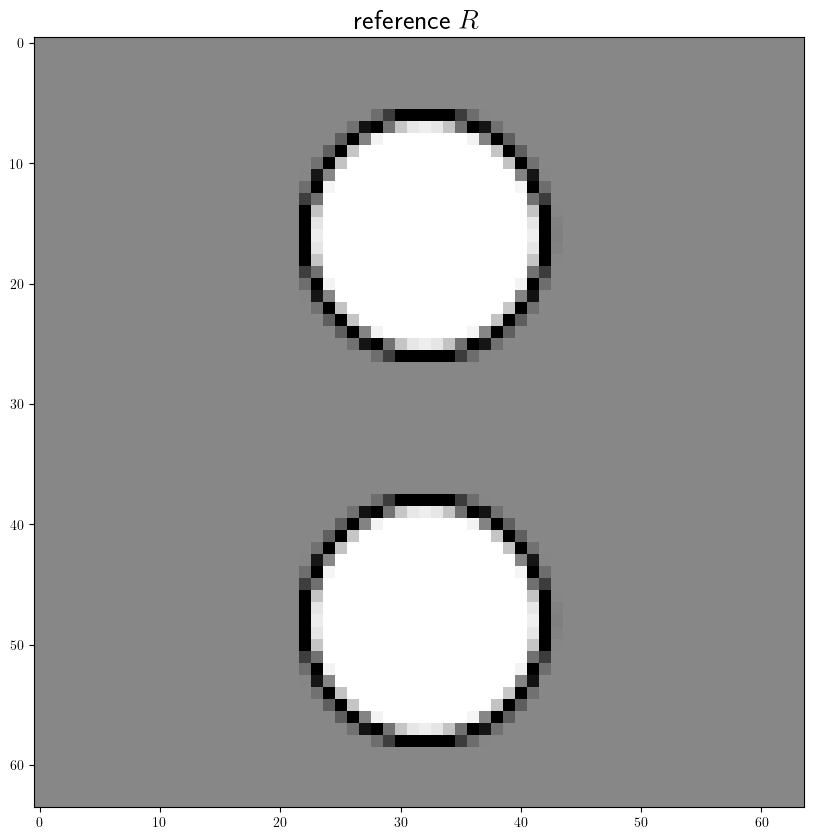

In [16]:
gray_image.show(R, "reference $R$")

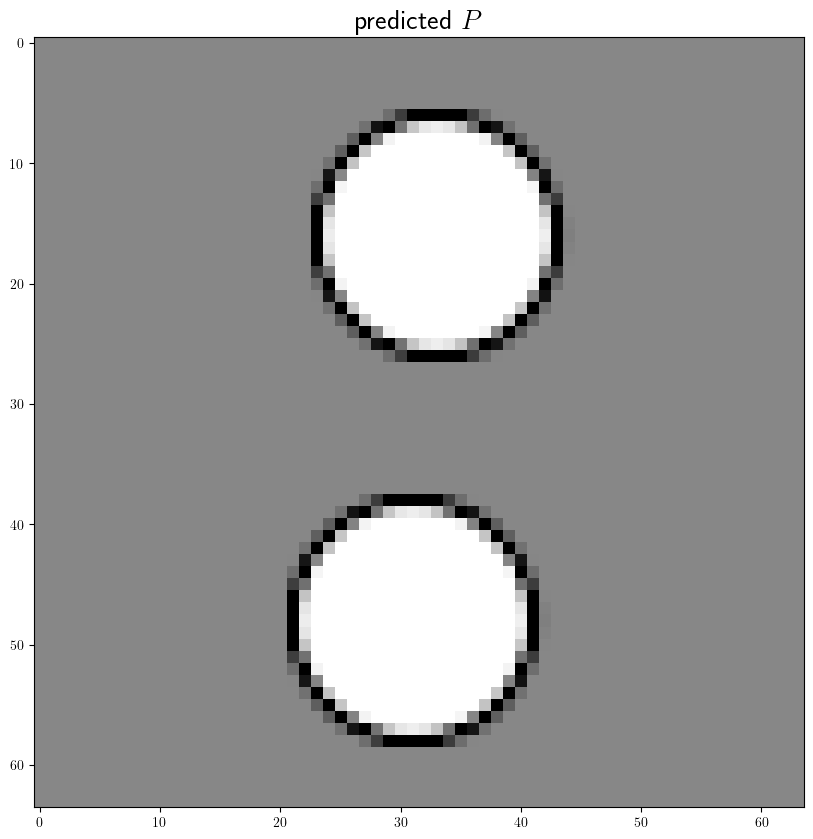

In [17]:
gray_image.show(P, "predicted $P$")

The top circle moves to the right and the bottom circle moves to the left. Therefore, if we want to generate the predicted frame (bottom) from the reference one (top), all the top MVs (Motion Vectors) related to the circle should be (x=1, y=0), and all the bottom MVs (-1, 0).

In [18]:
block_side = 32
max_abs_motion = 2
MVs = full_search.block_ME(P, R, block_side=block_side, max_abs_motion=max_abs_motion)

In [19]:
MVs.shape

(2, 2, 2)

In [20]:
for y in range(P.shape[0]//block_side):
    for x in range(P.shape[1]//block_side):
        print(MVs[y, x], end=' ')
    print()

[-1  0] [-1  0] 
[1 0] [1 0] 


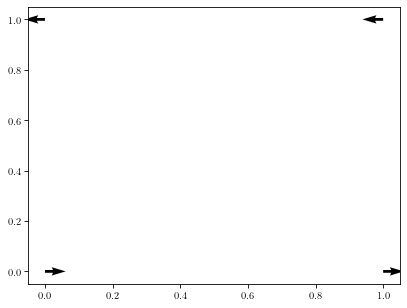

In [21]:
display.show_vectors(MVs[::1, ::1])

## Interpolate the MVs
The predictor expects a dense motion field.

In [22]:
from scipy import ndimage
_MVs = np.empty((P.shape[0], P.shape[1], 2), dtype=np.float32)
print(_MVs.shape)
_MVs[..., 0] = ndimage.zoom(MVs[..., 0], P.shape[0]/MVs.shape[0], order=0)
_MVs[..., 1] = ndimage.zoom(MVs[..., 1], P.shape[0]/MVs.shape[0], order=0)

(64, 64, 2)


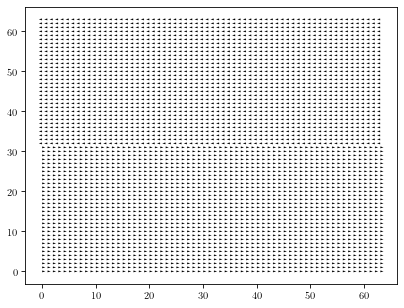

In [23]:
display.show_vectors(_MVs[::1, ::1])

## Make the prediction

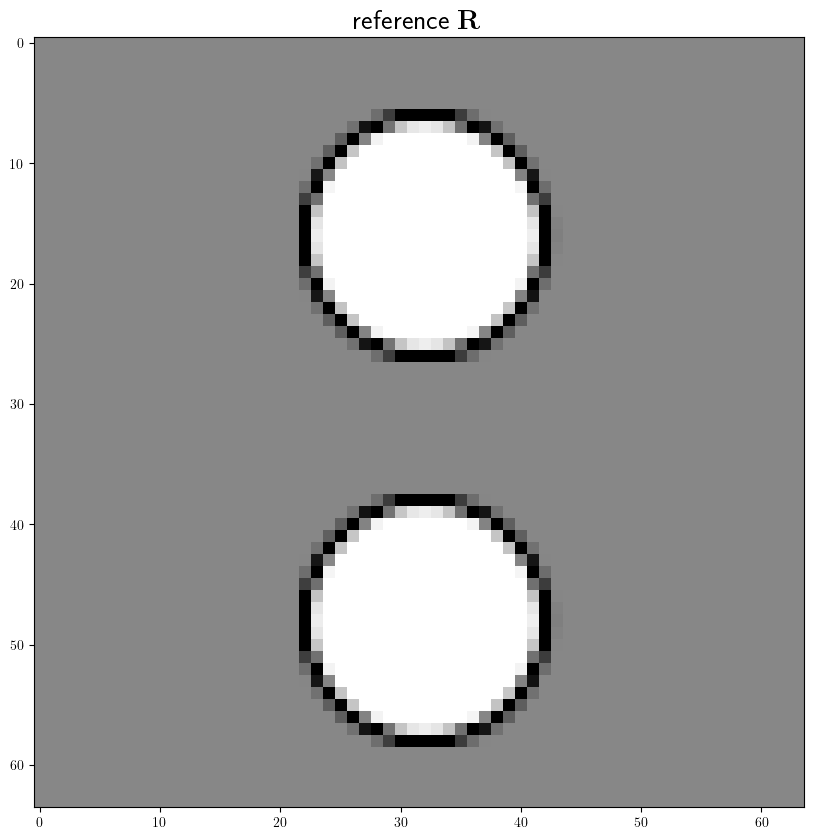

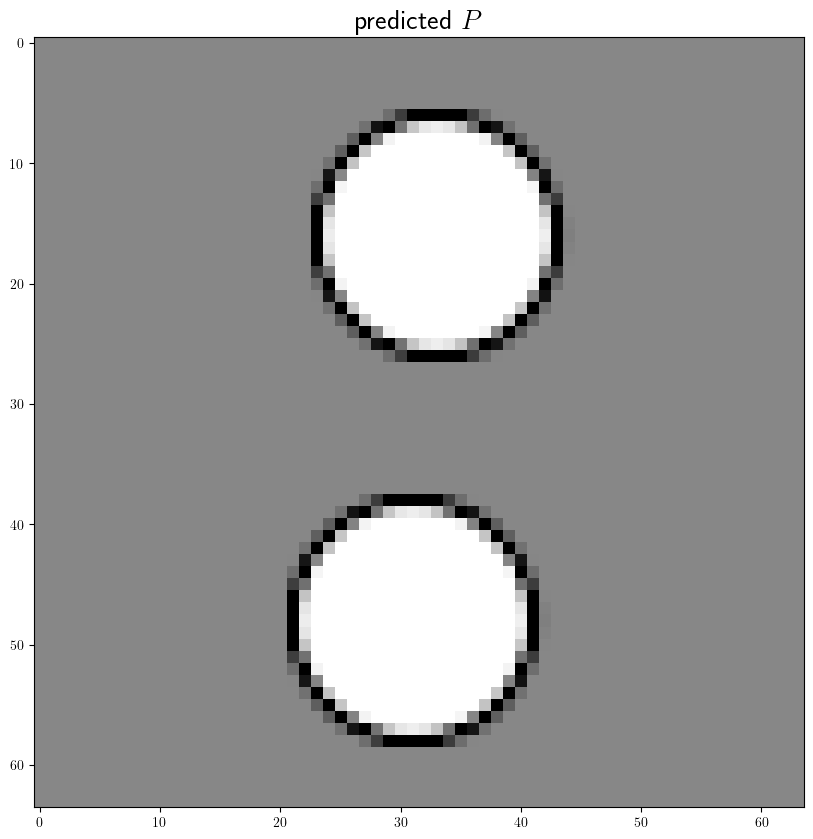

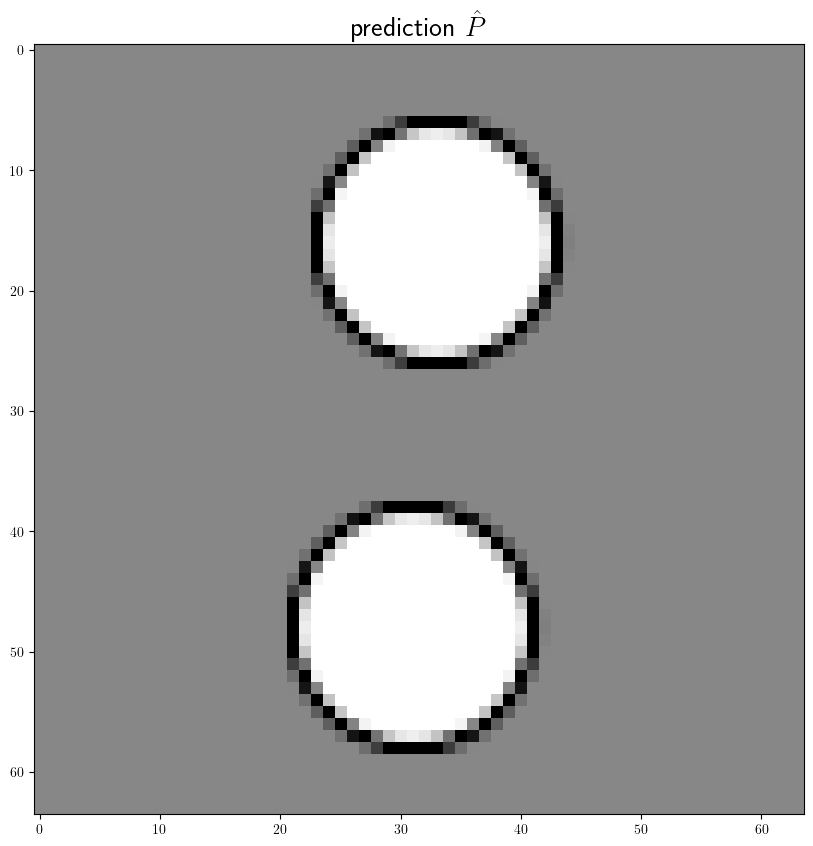

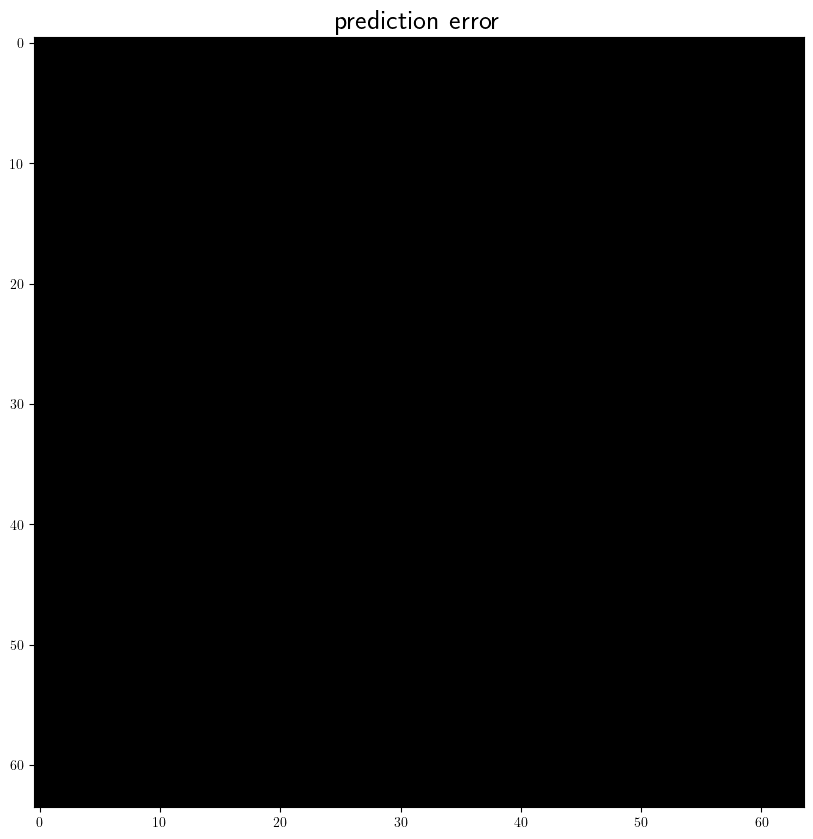

In [24]:
hat_P = prediction.make(R, _MVs)
gray_image.show(R, "reference ${\mathbf R}$")
gray_image.show(P, "predicted $P$")
gray_image.show(hat_P, "prediction $\hat{P}$")
gray_image.show(P - hat_P, "prediction error")

## Testing with moving circles (max_abs_motion=2)

In [25]:
R = RGB_image.read("/tmp/000.png").astype(np.int16)[...,0]
P = RGB_image.read("/tmp/002.png").astype(np.int16)[...,0]
#R = YUV.from_RGB(image_3.read("/home/vruiz/MRVC/sequences/moving_circles/", 0).astype(np.int16))[...,0]
#P = YUV.from_RGB(image_3.read("/home/vruiz/MRVC/sequences/moving_circles/", 2).astype(np.int16))[...,0]

[image_3.py:39 read() INFO] /tmp/000.png (64, 64, 3) uint8 len=736 max=255 min=0
[image_3.py:39 read() INFO] /tmp/002.png (64, 64, 3) uint8 len=736 max=255 min=0


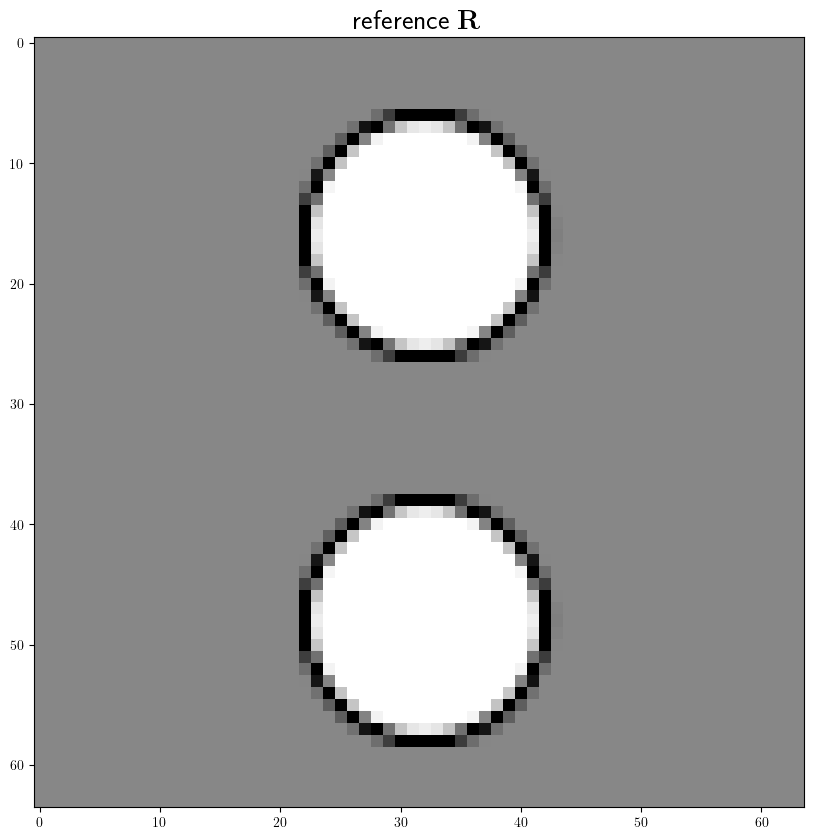

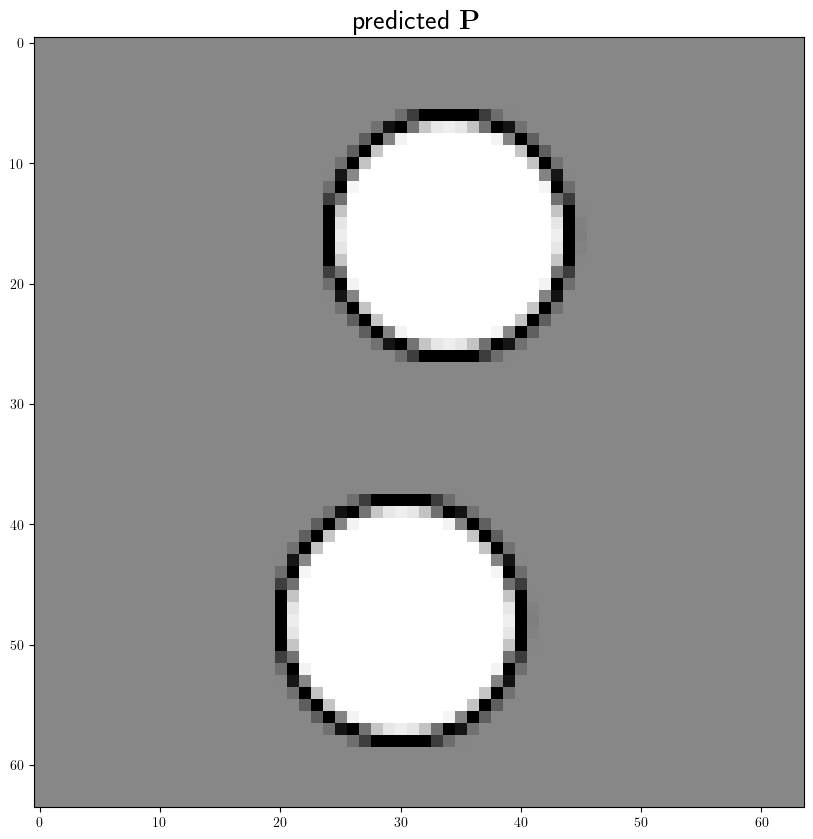

In [26]:
gray_image.show(R, "reference ${\mathbf R}$")
gray_image.show(P, "predicted ${\mathbf P}$")

In [27]:
block_side = 16
max_abs_motion = 4
MVs = full_search.block_ME(P, R, block_side=block_side, max_abs_motion=max_abs_motion)

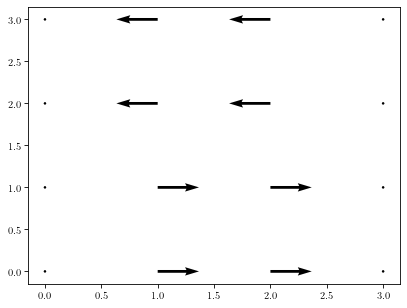

In [28]:
display.show_vectors(MVs[::1, ::1])

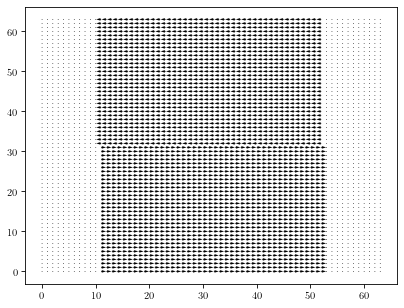

In [29]:
from scipy import ndimage
_MVs = np.empty((P.shape[0], P.shape[1], 2), dtype=np.float32)
_MVs[..., 0] = ndimage.zoom(MVs[..., 0], P.shape[0]/MVs.shape[0], order=0)
_MVs[..., 1] = ndimage.zoom(MVs[..., 1], P.shape[0]/MVs.shape[0], order=0)
display.show_vectors(_MVs[::1, ::1])

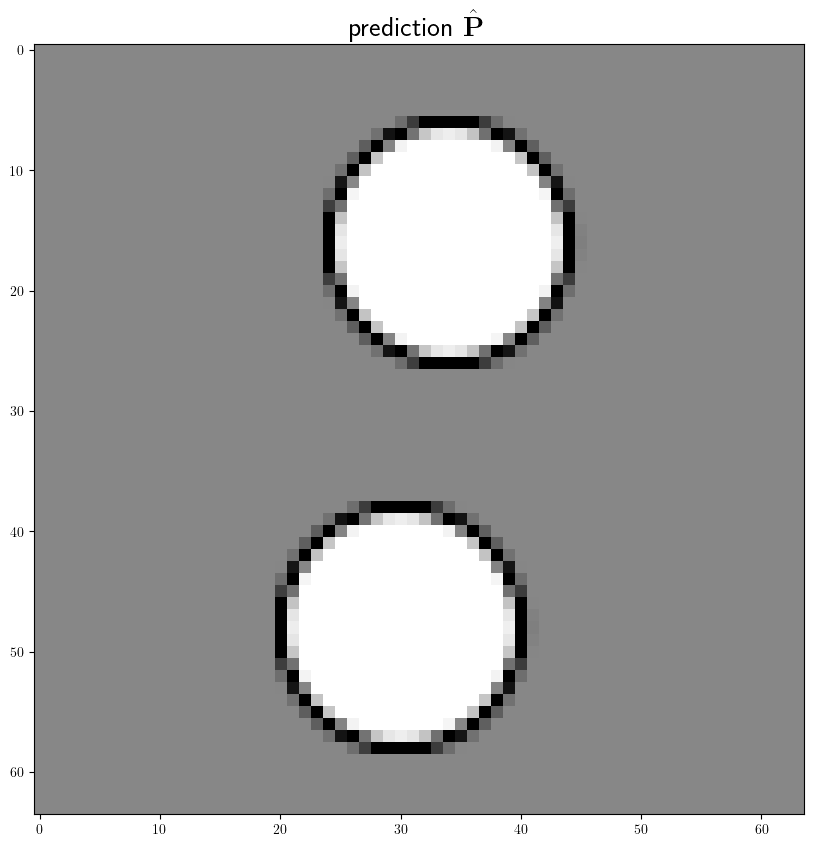

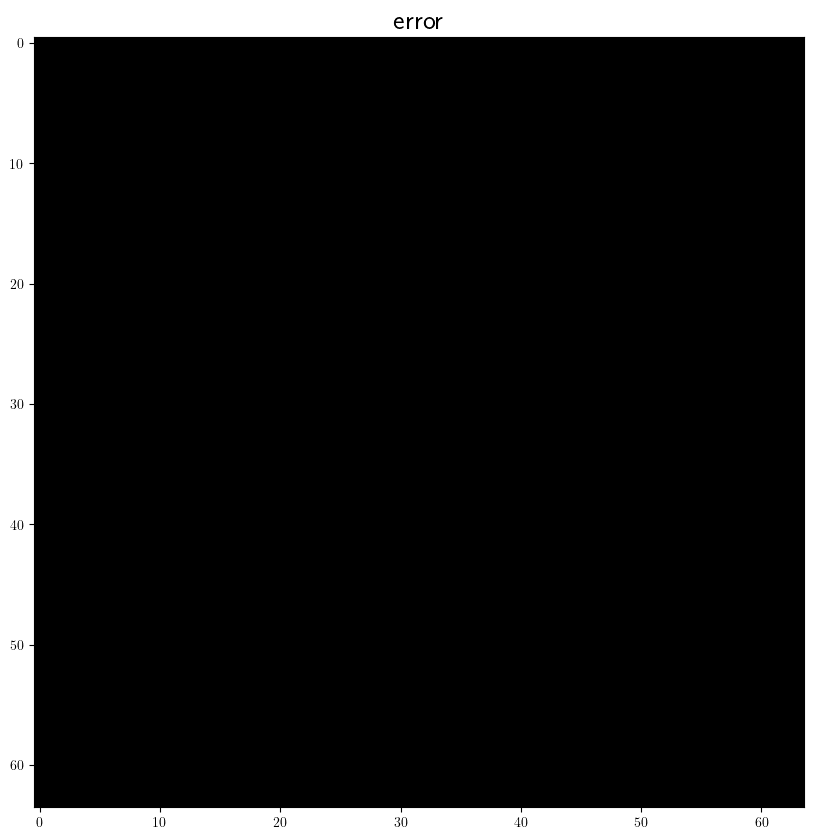

In [30]:
hat_P = prediction.make(R, _MVs)
gray_image.show(hat_P, "prediction $\hat{\mathbf P}$")
gray_image.show(P - hat_P, "error")

## Even more distance

In [31]:
R = RGB_image.read("/tmp/000.png").astype(np.int16)[...,0]
P = RGB_image.read("/tmp/004.png").astype(np.int16)[...,0]
#R = YUV.from_RGB(image_3.read("/home/vruiz/MRVC/sequences/moving_circles/", 0).astype(np.int16))[...,0]
#P = YUV.from_RGB(image_3.read("/home/vruiz/MRVC/sequences/moving_circles/", 4).astype(np.int16))[...,0]

[image_3.py:39 read() INFO] /tmp/000.png (64, 64, 3) uint8 len=736 max=255 min=0
[image_3.py:39 read() INFO] /tmp/004.png (64, 64, 3) uint8 len=736 max=255 min=0


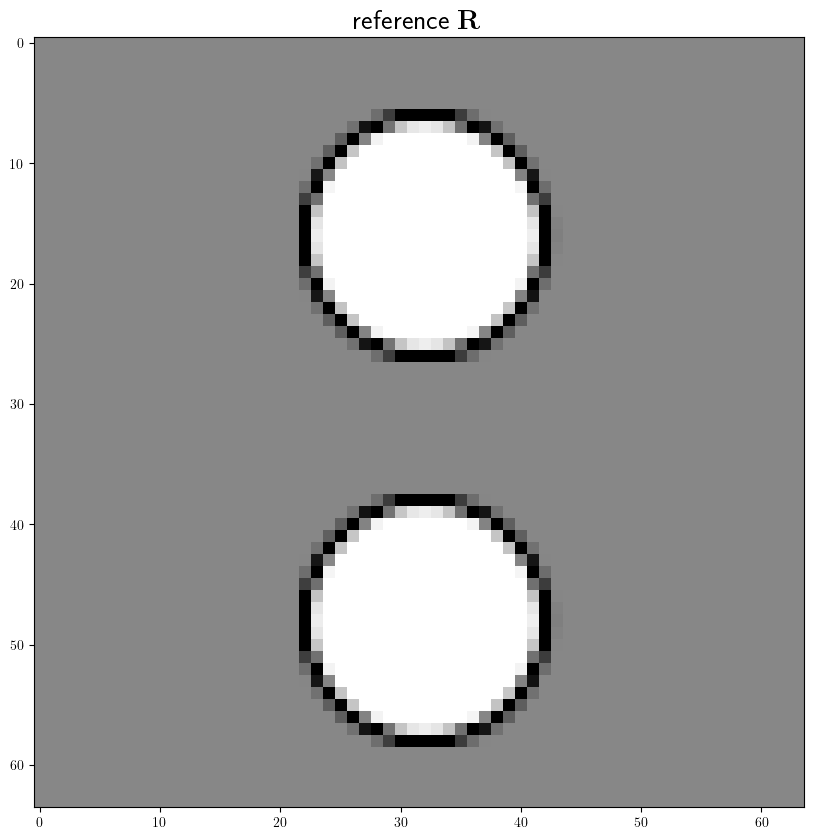

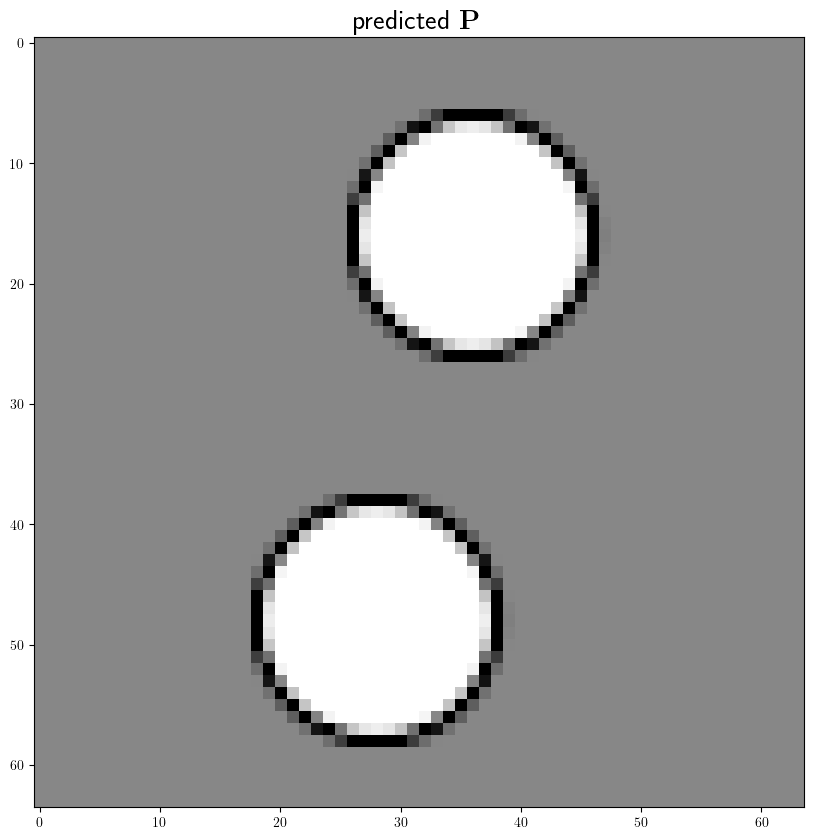

In [32]:
gray_image.show(R, "reference ${\mathbf R}$")
gray_image.show(P, "predicted ${\mathbf P}$")

In [33]:
block_side = 16
max_abs_motion = 8
MVs = full_search.block_ME(P, R, block_side=block_side, max_abs_motion=max_abs_motion)

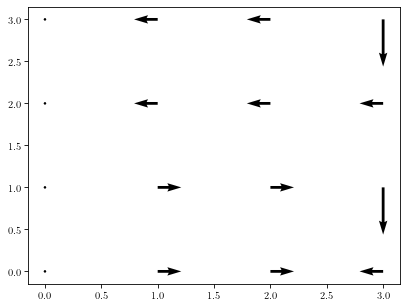

In [34]:
display.show_vectors(MVs[::1, ::1])

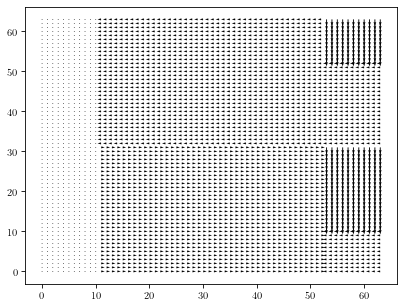

In [35]:
from scipy import ndimage
_MVs = np.empty((P.shape[0], P.shape[1], 2), dtype=np.float32)
_MVs[..., 0] = ndimage.zoom(MVs[..., 0], P.shape[0]/MVs.shape[0], order=0)
_MVs[..., 1] = ndimage.zoom(MVs[..., 1], P.shape[0]/MVs.shape[0], order=0)
display.show_vectors(_MVs[::1, ::1])

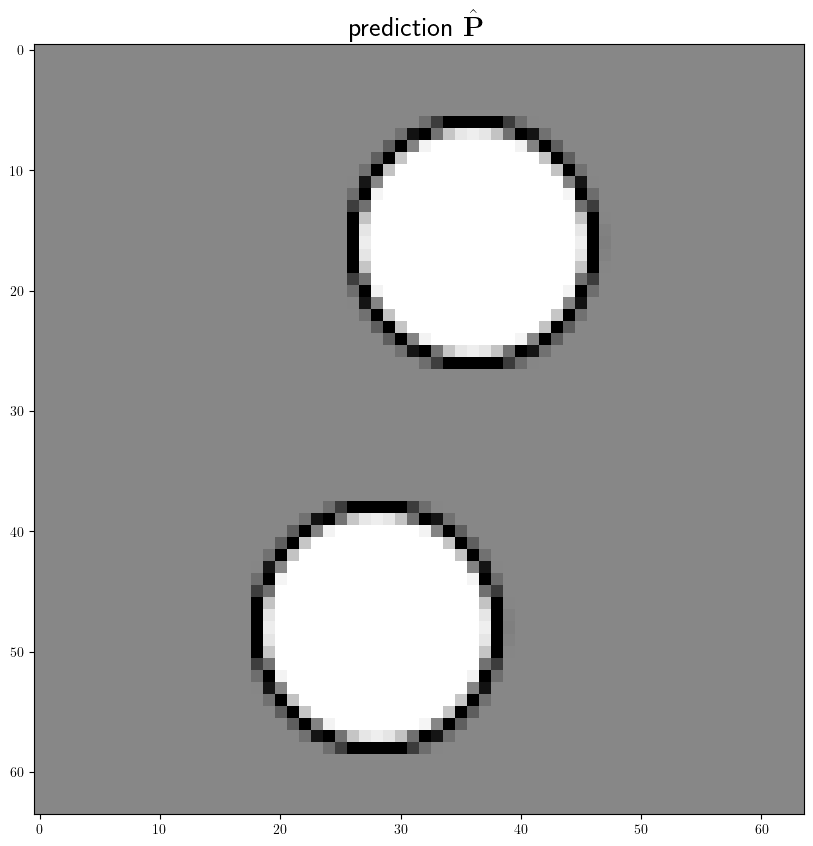

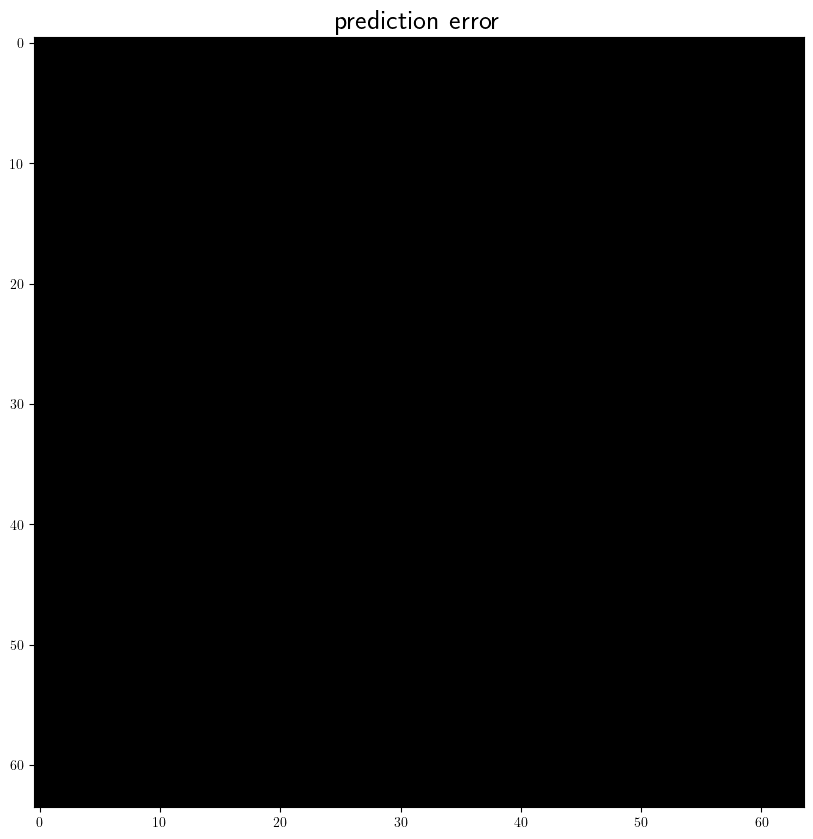

In [36]:
hat_P = prediction.make(R, _MVs)
gray_image.show(hat_P, "prediction $\hat{\mathbf P}$")
gray_image.show(P-hat_P, "prediction error")

## Now with a real image
A tile of Stockholm.

In [37]:
%%bash
URL="https://hpca.ual.es/~vruiz/videos/"
sequence="stockholm_1280x768x50x420x578.avi"
output_prefix="/tmp/original_"
number_of_frames=16
first_frame=2
~/repos/image_synthesis/extract_frames.sh -u $URL -s $sequence -o $output_prefix -n $number_of_frames -f $first_frame

URL = https://hpca.ual.es/~vruiz/videos/
sequence file name = stockholm_1280x768x50x420x578.avi
output prefix = /tmp/original_
number of frames to extract = 16
first frame to extract = 2
/tmp/stockholm_1280x768x50x420x578.avi exists. Only extracting ...


ffmpeg version n5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 -

### ... but first without using ME
Notice that we work only with a tile of the original image.

[image_3.py:39 read() INFO] /tmp/original_002.png (768, 1280, 3) uint8 len=1927590 max=255 min=0
[image_3.py:39 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 len=1927644 max=255 min=0
[image_3.py:87 print_stats() INFO] component=0 max=255 min=0 avg=107.82782745361328
[image_3.py:87 print_stats() INFO] component=1 max=251 min=0 avg=92.80522918701172
[image_3.py:87 print_stats() INFO] component=2 max=246 min=0 avg=76.52688598632812
[image_3.py:87 print_stats() INFO] component=0 max=255 min=0 avg=108.06977081298828
[image_3.py:87 print_stats() INFO] component=1 max=251 min=0 avg=92.90747833251953
[image_3.py:87 print_stats() INFO] component=2 max=242 min=0 avg=76.5910873413086
[image_3.py:87 print_stats() INFO] component=0 max=255 min=0 avg=128.23760986328125
[image_3.py:87 print_stats() INFO] component=1 max=255 min=0 avg=128.09925079345703
[image_3.py:87 print_stats() INFO] component=2 max=255 min=0 avg=128.06541442871094


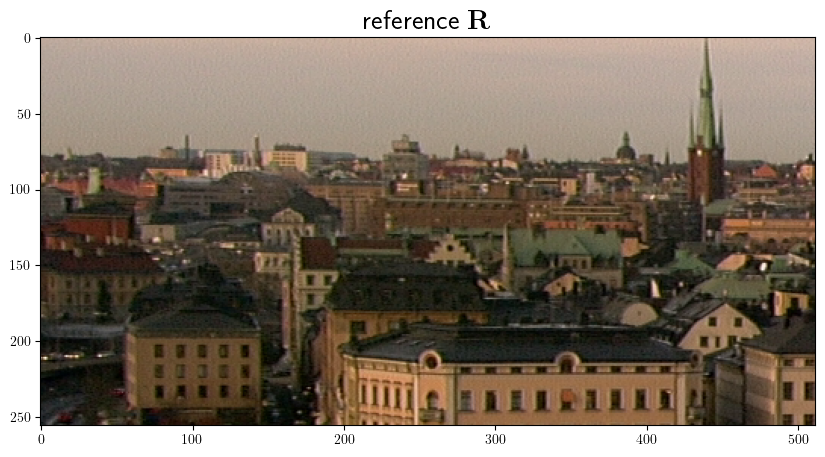

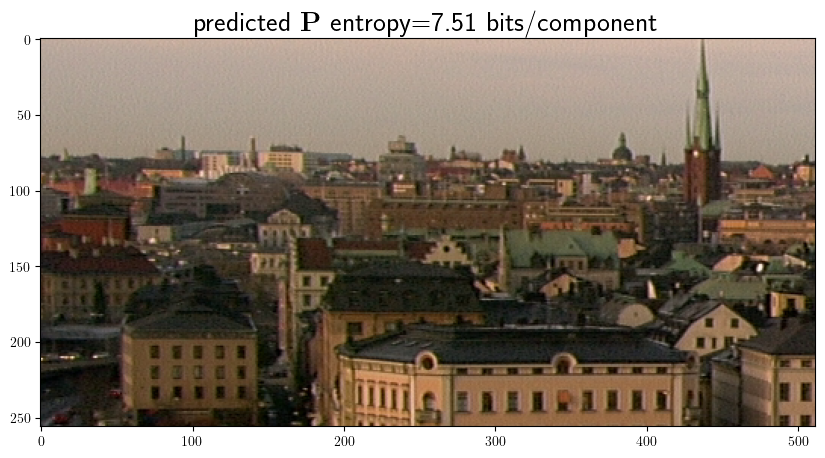

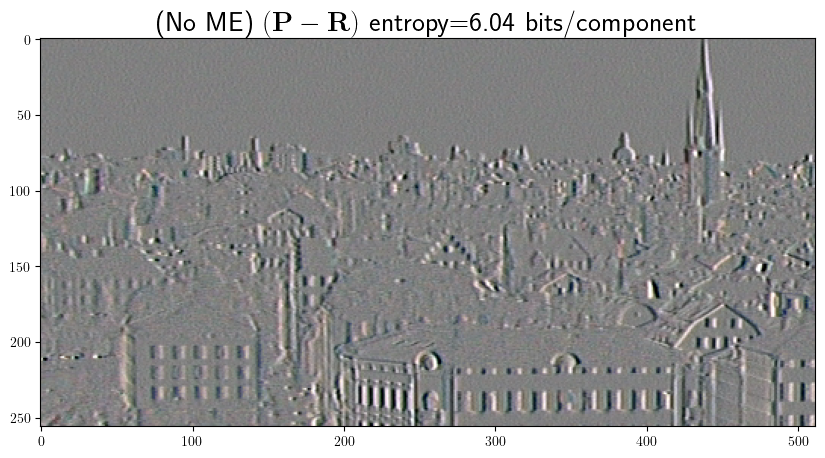

In [38]:
slice_Y = slice(100,356)
slice_X = slice(100,612)
sequence = "/tmp/original_"
R = RGB_image.read(sequence + "002.png")[slice_Y, slice_X]
P = RGB_image.read(sequence + "003.png")[slice_Y, slice_X]
RGB_image.show(R, "reference ${\mathbf R}$")
entropy = information.entropy(P.flatten())
RGB_image.show(P, "predicted ${\mathbf P}$" + f" entropy={entropy:1.2f} bits/component")
predicted_entropy = entropy
P_R = np.clip(P.astype(np.int16) - R + 128, 0, 255)
entropy = information.entropy(P_R.flatten())
RGB_image.show(P_R.astype(np.uint8), "(No ME) $({\mathbf P} - {\mathbf R})$" + f" entropy={entropy:1.2f} bits/component")

### ... and now using BBME

In [39]:
block_side = 32
max_abs_motion = 8
MVs = full_search.block_ME(P, R, block_side=block_side, max_abs_motion=max_abs_motion)

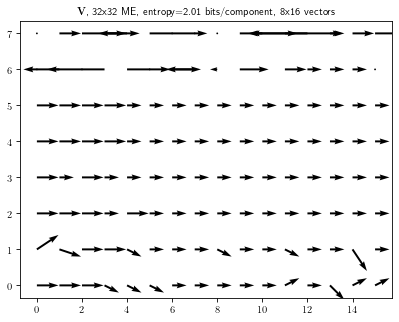

In [40]:
entropy = information.entropy(MVs.flatten())
motion_entropy = entropy
display.show_vectors(MVs[::1, ::1], title="${\mathbf V}$" + f", {block_side}x{block_side} ME" + f", entropy={entropy:1.2f} bits/component" +  f", {MVs.shape[0]}x{MVs.shape[1]} vectors")

In [41]:
P.shape[0]/block_side

8.0

In [42]:
P.shape[1]/block_side

16.0

In [43]:
from scipy import ndimage
zoom_MVs = np.empty((P.shape[0], P.shape[1], 2), dtype=np.float32)
print(_MVs.shape)
zoom_MVs[..., 0] = ndimage.zoom(MVs[..., 0], P.shape[0]/MVs.shape[0], order=0)
zoom_MVs[..., 1] = ndimage.zoom(MVs[..., 1], P.shape[0]/MVs.shape[0], order=0)

(64, 64, 2)


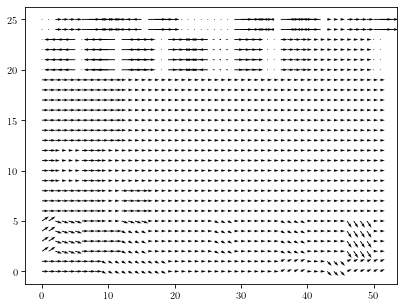

In [44]:
display.show_vectors(zoom_MVs[::10, ::10])

[image_3.py:87 print_stats() INFO] component=0 max=255 min=0 avg=108.06977081298828
[image_3.py:87 print_stats() INFO] component=1 max=251 min=0 avg=92.90747833251953
[image_3.py:87 print_stats() INFO] component=2 max=242 min=0 avg=76.5910873413086
[image_3.py:87 print_stats() INFO] component=0 max=255 min=0 avg=107.99169158935547
[image_3.py:87 print_stats() INFO] component=1 max=251 min=0 avg=92.92277526855469
[image_3.py:87 print_stats() INFO] component=2 max=246 min=0 avg=76.61649322509766
[image_3.py:87 print_stats() INFO] component=0 max=214 min=65 avg=128.0780792236328
[image_3.py:87 print_stats() INFO] component=1 max=202 min=69 avg=127.98470306396484
[image_3.py:87 print_stats() INFO] component=2 max=199 min=65 avg=127.97459411621094


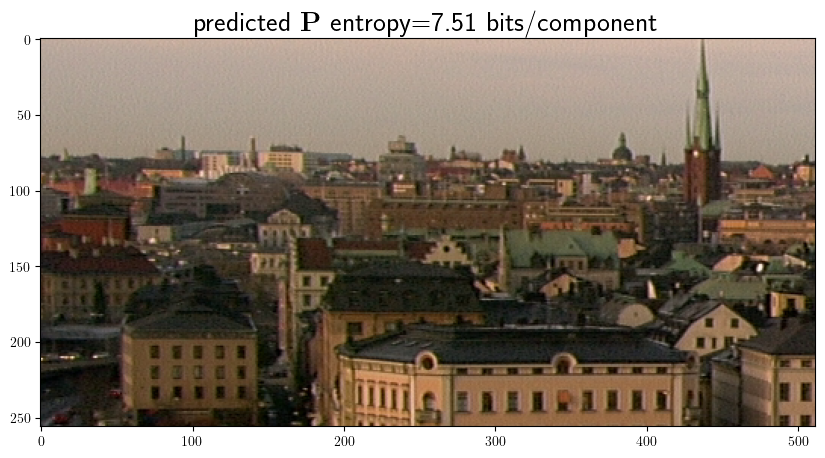

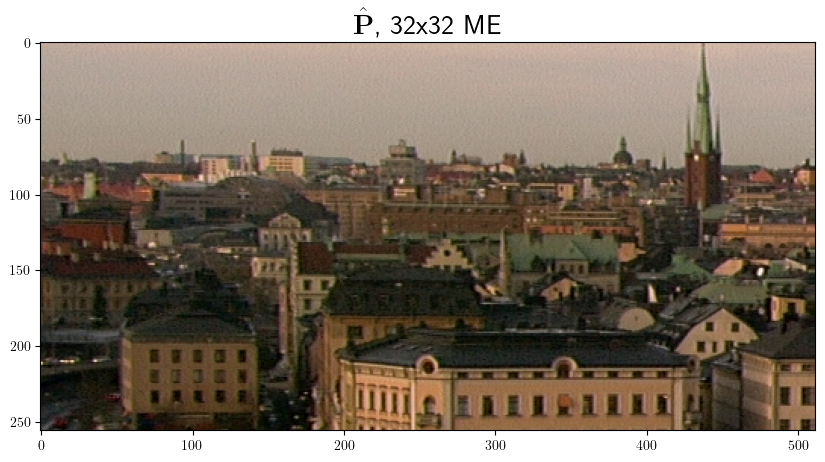

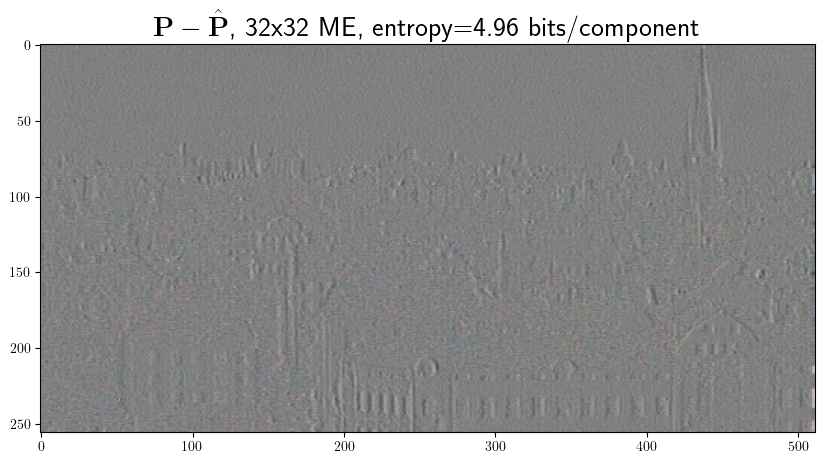

In [45]:
hat_P = prediction.make(R, zoom_MVs)
RGB_image.show(P, "predicted ${\mathbf P}$" + f" entropy={predicted_entropy:1.2f} bits/component")
RGB_image.show(hat_P, "$\hat{\mathbf P}$" + f", {block_side}x{block_side} ME")
P_hat_P = P - hat_P + 128
entropy = information.entropy(P_hat_P.flatten())
residue_entropy = entropy
RGB_image.show(P_hat_P.astype(np.uint8), "${\mathbf P} - \hat{\mathbf P}$" + f", {block_side}x{block_side} ME" + f", entropy={entropy:1.2f} bits/component")

In [46]:
print("Entropy of the predicted frame:                 ", f"{predicted_entropy:1.3f}", "bits/component")
print("Entropy of the residue frame:                   ", f"{residue_entropy:1.3f}", "bits/component")
print("Entropy reduction in the texture:               ", f"{predicted_entropy - residue_entropy:1.3f}", "bits/component")
print("Entropy of the components of the motion vectors:", f"{motion_entropy:1.3f}", "bits/component")
texture_length = residue_entropy * P.size
motion_length = motion_entropy * MVs.size
total_length = texture_length + motion_length
total_entropy = total_length / P.size
print("Entropy the texture + motion vectors:           ", f"{total_entropy:1.3f}", "bits/component")

Entropy of the predicted frame:                  7.512 bits/component
Entropy of the residue frame:                    4.962 bits/component
Entropy reduction in the texture:                2.550 bits/component
Entropy of the components of the motion vectors: 2.014 bits/component
Entropy the texture + motion vectors:            4.963 bits/component


## Evaluate (visually) the ME on other sequences (TODO)